In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib import request
from PIL import Image
from IPython.display import display

datapath = 'dataset/full_emoji.csv'
df = pd.read_csv(datapath)
df.head()

,#,emoji,unicode,name,Apple,Google,Facebook,Windows,Twitter,JoyPixels,Samsung,Gmail,SoftBank,DoCoMo,KDDI
0,1,😀,U+1F600,grinning face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAPAKIFAJh3AP/z...",NaN,NaN,NaN
1,2,😃,U+1F603,grinning face with big eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIFAF5LAP/z...","data:image/png;base64,R0lGODlhDwAPAKIAAP///wAA...","data:image/png;base64,R0lGODlhDAAMAIABAMxm////...","data:image/png;base64,R0lGODlhDgAPALMJAP//mf/M..."
2,3,😄,U+1F604,grinning face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIGAF5LAJh3...","data:image/png;base64,R0lGODlhDwAPAHcAMSH+GlNv...",NaN,NaN
3,4,😁,U+1F601,beaming face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIGAIoAAf/v...","data:image/png;base64,R0lGODlhDwAPAHcAMSH+GlNv...","data:image/png;base64,R0lGODlhDAAMAIABAP+ZAP//...","data:image/png;base64,R0lGODlhDgAPALMIAJmZmf//..."
4,5,😆,U+1F606,grinning squinting face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhEAAMAKIFAF5LAP/z...",NaN,"data:image/png;base64,R0lGODlhDAAMAIABAMxm////...",NaN


In [2]:
def toimg(img_url):
    request.urlretrieve(img_url, 'img')
    img = Image.open('img')
    return img

def imgtoarray(img_url):
    try:
        img = toimg(img_url)
        return np.asarray(img)
    except TypeError:
        return None

In [3]:
google_images = []
for url in df['Google'][:100].to_list():
    google_images.append(imgtoarray(url))
google_images = np.asarray(google_images)
google_images.shape

(100, 72, 72, 4)

In [4]:
google_images = google_images / 255.0
train_img = google_images[:80]
test_img = google_images[80:]
train_img.shape, test_img.shape

((80, 72, 72, 4), (20, 72, 72, 4))

In [5]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [6]:
class Autoencoder(Model):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
              layers.Input(shape=(72, 72, 4)), 
              layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
              layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)
        ])
        self.decoder = tf.keras.Sequential([
              layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
              layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
              layers.Conv2D(4, kernel_size=(3,3), activation='sigmoid', padding='same')
        ])


    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [7]:
model = Autoencoder()
model.compile(optimizer='adam', loss='mse')
model.fit(train_img, train_img,
          epochs=10,
          shuffle=True,
          validation_data=(test_img, test_img))

2022-02-14 12:52:30.512439: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-14 12:52:30.512599: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-02-14 12:52:30.581871: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Metal device set to: Apple M1 Max
Epoch 1/10
3/3 [==============================] - ETA: 0s - loss: 0.1892

2022-02-14 12:52:30.796502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 82ms/step - loss: 0.1892 - val_loss: 0.1885
Epoch 2/10
3/3 [==============================] - 0s 16ms/step - loss: 0.1866 - val_loss: 0.1854
Epoch 3/10
3/3 [==============================] - 0s 14ms/step - loss: 0.1824 - val_loss: 0.1805
Epoch 4/10
3/3 [==============================] - 0s 15ms/step - loss: 0.1760 - val_loss: 0.1737
Epoch 5/10
1/3 [=========>....................] - ETA: 0s - loss: 0.1700

2022-02-14 12:52:31.064672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 15ms/step - loss: 0.1670 - val_loss: 0.1650
Epoch 6/10
3/3 [==============================] - 0s 17ms/step - loss: 0.1557 - val_loss: 0.1561
Epoch 7/10
3/3 [==============================] - 0s 15ms/step - loss: 0.1436 - val_loss: 0.1497
Epoch 8/10
3/3 [==============================] - 0s 15ms/step - loss: 0.1349 - val_loss: 0.1479
Epoch 9/10
3/3 [==============================] - 0s 16ms/step - loss: 0.1302 - val_loss: 0.1478
Epoch 10/10
3/3 [==============================] - 0s 26ms/step - loss: 0.1277 - val_loss: 0.1458


In [11]:
encoded_imgs = model.encoder(test_img).numpy()
decoded_imgs = model.decoder(encoded_imgs).numpy()

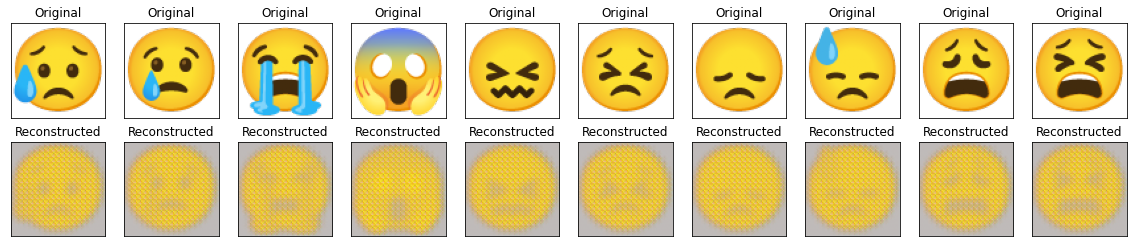

In [12]:
n = 10

plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_img[i])
    plt.title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()